E: -20.049937732922828
ψ: 2.061153622438558e-09
a: 10.0


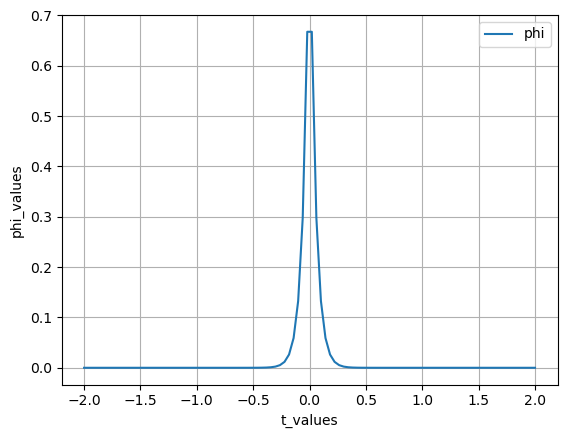

In [5]:
# Task 7-8. Variant 9.
# 1.

import numpy as np
import matplotlib.pyplot as plt
import sympy
from scipy.linalg import eigh
from scipy.optimize import minimize, Bounds
from scipy.integrate import quad

x = sympy.symbols('x')
a = sympy.symbols('a')

fp = sympy.Piecewise(
    (sympy.exp(2 * a * x) * (-sympy.diff(sympy.exp(2 * a * x), x, 2) - sympy.exp(- x ** 2) * sympy.exp(2 * a * x)), x < 0), 
    (sympy.exp(-2 * a * x) * (-sympy.diff(sympy.exp(-2 * a * x), x, 2) - sympy.exp(- x ** 2) * sympy.exp(-2 * a * x)), x >= 0))

phi_expr = sympy.exp(-2 * a * abs(x))

fp_lambdified = sympy.lambdify((x, a), fp, 'numpy')

def f(a):
    return quad(fp_lambdified, -10, 10, args=(a))[0]

bounds = Bounds([-10], [10])

result = minimize(f, 1, method='L-BFGS-B', bounds=bounds)

f_value = result.fun
a_value = result.x[0]

phi = sympy.lambdify(x, phi_expr.subs(a, a_value), 'numpy')

t = np.linspace(-2, 2, 100)
phi_values = phi(t)

x_value = 1.0 
phi_value = phi(x_value)

print(f"E: {f_value}")
print(f"ψ: {phi_value}")
print(f"a: {a_value}")

plt.plot(t, phi_values, label='phi')
plt.xlabel('t_values')
plt.ylabel('phi_values')
plt.legend()
plt.grid(True)
plt.show()


-0.30985534196296866 0.6961216089148462 1.8732013692396965


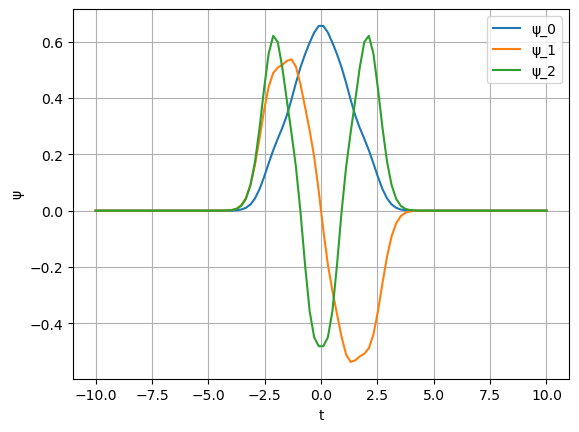

In [9]:
# 2.

import sympy
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt

x = sympy.symbols('x')
n = 10
phi = []
h_phi = []
a_matrix = np.zeros((n, n))
g_matrix = np.zeros((n, n))

for i in range(n):
    phi_expr = sympy.chebyshevt(i, x) * sympy.exp(-x**2)
    h_phi_expr = sympy.simplify(-sympy.diff(phi_expr, x, 2) + (-sympy.exp(-x ** 2) * phi_expr))
        
    phi.append(phi_expr)
    h_phi.append(h_phi_expr)

for i in range(n):
    for j in range(n):
        a_matrix[i,j] = sympy.integrate(phi[i] * h_phi[j], (x, -sympy.oo, sympy.oo))
        g_matrix[i,j] = sympy.integrate(phi[i] * phi[j], (x, -sympy.oo, sympy.oo))

np.set_printoptions(precision=3, suppress=True)
# print("Матрица a:")
# print(a_matrix)
# print("\n Матрица g:")
# print(g_matrix)

eigenvalues, eigenvector = eigh(a_matrix, g_matrix)
v0 = eigenvector[:,0]
v1 = eigenvector[:,1]
v2 = eigenvector[:,2]

print()
print(eigenvalues[0], eigenvalues[1], eigenvalues[2])

ψ_0, ψ_1, ψ_2 = phi[0], phi[0], phi[0]
for i in range(n):
    ψ_0 += v0[i] * phi[i]
    ψ_1 += v1[i] * phi[i]
    ψ_2 += v2[i] * phi[i]
ψ_0 -= phi[0]
ψ_1 -= phi[0]
ψ_2 -= phi[0]

ψ_0 = sympy.lambdify(x, sympy.simplify(ψ_0))
ψ_1 = sympy.lambdify(x, sympy.simplify(ψ_1))
ψ_2 = sympy.lambdify(x, sympy.simplify(ψ_2))

t = np.linspace(-10, 10, 100)
ψ_0_values = ψ_0(t)
ψ_1_values = ψ_1(t)
ψ_2_values = ψ_2(t)

plt.plot(t, ψ_0_values, label='ψ_0')
plt.plot(t, ψ_1_values, label='ψ_1')
plt.plot(t, ψ_2_values, label='ψ_2')
plt.xlabel('t')
plt.ylabel('ψ')
plt.legend()
plt.grid(True)
plt.show()